### **Prediction of Electrical Power Output in a Combined Cycle Power Plant**

**Abstract**

This study aims to predict the full-load electrical power output of a Combined Cycle Power Plant using machine learning regression models. The dataset includes four key operational parameters: **Ambient Temperature, Atmospheric Pressure, Relative Humidity, and Exhaust Steam Pressure**. Various regression models were tested, and **Random Forest Regression** achieved the highest accuracy with an **R² score of 0.97**. Feature importance analysis identified **Ambient Temperature** and **Exhaust Steam Pressure** as the most influential factors. The findings demonstrate the potential of machine learning in optimizing power plant performance and improving energy efficiency.

**Machine Learning Models Used**

Linear Regression,
Ridge Regression,
Lasso Regression,
Decision Tree Regression,
Random Forest Regression,
Gradient Boosting Regression,
Support Vector Regression (SVR)

**Visualisation tool**

Scatter Plots,
Correlation Heatmap,
Feature Importance Plot,
Actual vs. Predicted Scatter Plot,
Residual Distribution Plot

1 # Import Library

In [2]:
import itertools
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

2 # Load dataset

In [3]:
# Load dataset (replace with actual path if using a CSV file)
data = pd.read_excel("rawdata.xlsx")  # Assume dataset has relevant columns

3 # Check data

In [4]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

4 # Rename columns

In [8]:
data.rename(columns={
    'AT': 'Ambient_Temperature',
    'AP': 'Atmospheric_Pressure',
    'RH': 'Relative_Humidity',
    'V': 'Exhaust_Steam_Pressure',
    'PE': 'Power_Output'
}, inplace=True)
data.head()

,Ambient_Temperature,Exhaust_Steam_Pressure,Atmospheric_Pressure,Relative_Humidity,Power_Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


5 # Define feature set and target variable

In [9]:
features = ["Ambient_Temperature", "Atmospheric_Pressure", "Relative_Humidity", "Exhaust_Steam_Pressure"]
target = "Power_Output"

6 # Scatter plots

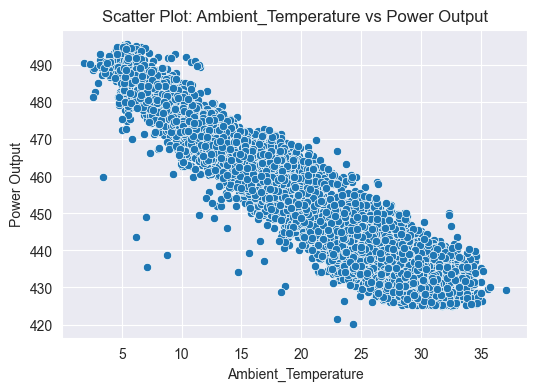

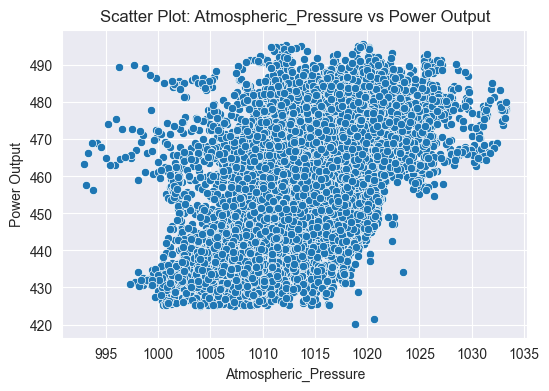

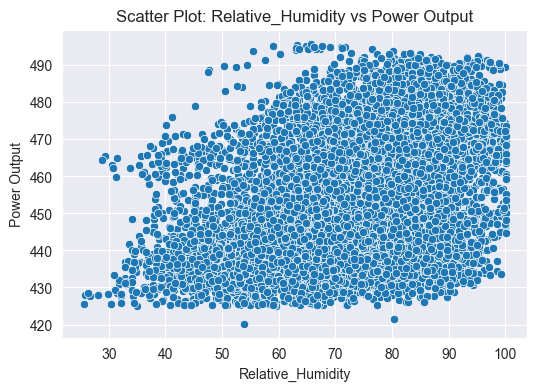

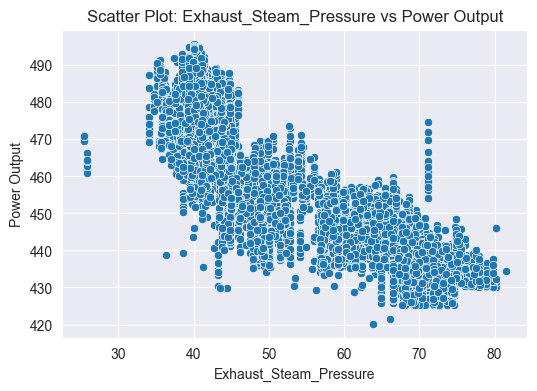

In [10]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[feature], y=data[target])
    plt.xlabel(feature)
    plt.ylabel("Power Output")
    plt.title(f"Scatter Plot: {feature} vs Power Output")
    plt.show()

7 # Visualizing correlation with heatmap

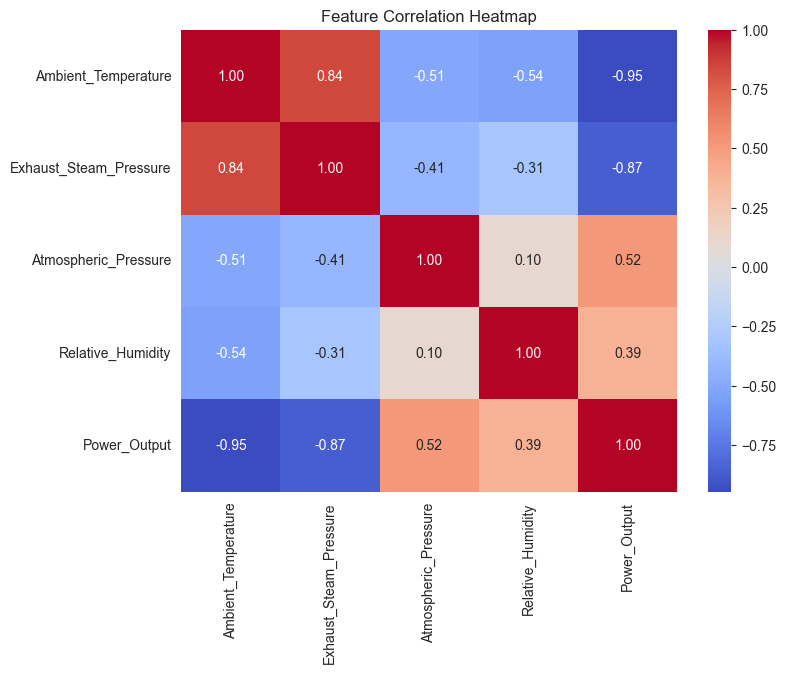

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


8 # Regression models to train

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR()
}


9 # Store results in separate lists for different feature set sizes

In [13]:
results_1_feature = []
results_2_features = []
results_3_features = []
results_4_features = []

# Iterate over all possible subsets of features
for i in range(1, len(features) + 1):
    for subset in itertools.combinations(features, i):
        subset = list(subset)
        X = data[subset]
        y = data[target]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train models and evaluate performance
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            result_entry = [subset, model_name, round(mse, 4), round(r2, 4)]

            # Store in the corresponding list
            if i == 1:
                results_1_feature.append(result_entry)
            elif i == 2:
                results_2_features.append(result_entry)
            elif i == 3:
                results_3_features.append(result_entry)
            else:
                results_4_features.append(result_entry)

10 # Sort results by R² Score in descending order

In [14]:
results_1_feature.sort(key=lambda x: x[3], reverse=True)
results_2_features.sort(key=lambda x: x[3], reverse=True)
results_3_features.sort(key=lambda x: x[3], reverse=True)
results_4_features.sort(key=lambda x: x[3], reverse=True)

11 # Display results using tabulate

In [15]:
print("\n📌 **Models with 1 Feature:**")
print(tabulate(results_1_feature, headers=["Feature Subset", "Model", "MSE", "R² Score"], tablefmt="grid"))

print("\n📌 **Models with 2 Features:**")
print(tabulate(results_2_features, headers=["Feature Subset", "Model", "MSE", "R² Score"], tablefmt="grid"))

print("\n📌 **Models with 3 Features:**")
print(tabulate(results_3_features, headers=["Feature Subset", "Model", "MSE", "R² Score"], tablefmt="grid"))

print("\n📌 **Models with 4 Features:**")
print(tabulate(results_4_features, headers=["Feature Subset", "Model", "MSE", "R² Score"], tablefmt="grid"))


📌 **Models with 1 Feature:**
+----------------------------+---------------------------+----------+------------+
| Feature Subset             | Model                     |      MSE |   R² Score |
+============================+===========================+==========+============+
| ['Exhaust_Steam_Pressure'] | Random Forest             |  24.2807 |     0.9163 |
+----------------------------+---------------------------+----------+------------+
| ['Exhaust_Steam_Pressure'] | Decision Tree             |  24.3211 |     0.9162 |
+----------------------------+---------------------------+----------+------------+
| ['Ambient_Temperature']    | Support Vector Regression |  25.2333 |     0.913  |
+----------------------------+---------------------------+----------+------------+
| ['Ambient_Temperature']    | Gradient Boosting         |  25.344  |     0.9126 |
+----------------------------+---------------------------+----------+------------+
| ['Ambient_Temperature']    | Lasso Regression          

12 # Print the best R² Score from each result table

In [16]:
best_1_feature = results_1_feature[0] if results_1_feature else None
best_2_features = results_2_features[0] if results_2_features else None
best_3_features = results_3_features[0] if results_3_features else None
best_4_features = results_4_features[0] if results_4_features else None

print("\n🎯 **Best Model for Each Feature Subset**")
if best_1_feature:
    print(f"✅ Best 1 Feature Model: {best_1_feature[1]} | Features: {best_1_feature[0]} | R²: {best_1_feature[3]}")
if best_2_features:
    print(f"✅ Best 2 Feature Model: {best_2_features[1]} | Features: {best_2_features[0]} | R²: {best_2_features[3]}")
if best_3_features:
    print(f"✅ Best 3 Feature Model: {best_3_features[1]} | Features: {best_3_features[0]} | R²: {best_3_features[3]}")
if best_4_features:
    print(f"✅ Best 4 Feature Model: {best_4_features[1]} | Features: {best_4_features[0]} | R²: {best_4_features[3]}")



🎯 **Best Model for Each Feature Subset**
✅ Best 1 Feature Model: Random Forest | Features: ['Exhaust_Steam_Pressure'] | R²: 0.9163
✅ Best 2 Feature Model: Random Forest | Features: ['Ambient_Temperature', 'Exhaust_Steam_Pressure'] | R²: 0.953
✅ Best 3 Feature Model: Random Forest | Features: ['Ambient_Temperature', 'Atmospheric_Pressure', 'Exhaust_Steam_Pressure'] | R²: 0.9626
✅ Best 4 Feature Model: Random Forest | Features: ['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity', 'Exhaust_Steam_Pressure'] | R²: 0.9641


14 # Use best feature combination to train Random Forest Model

In [17]:
# Define feature set (X) and target variable (y)
X_finalize = data[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity', 'Exhaust_Steam_Pressure']]
y_finalize = data['Power_Output']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_finalize, y_finalize, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)


15 # Feature Importance Plot

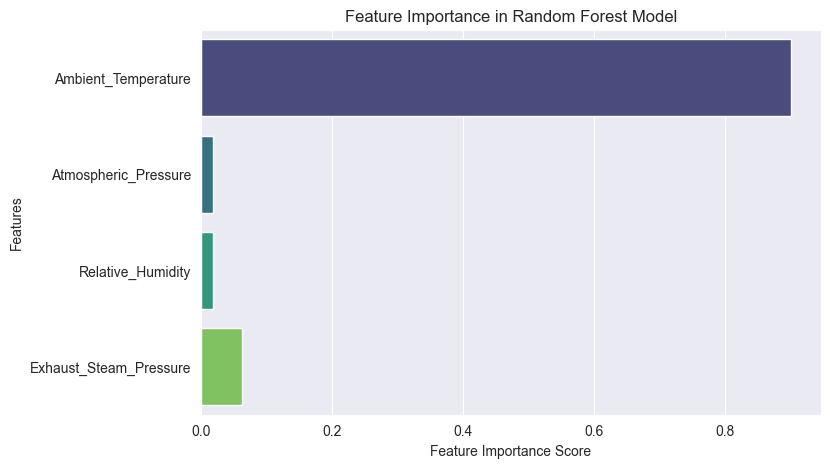

In [18]:
plt.figure(figsize=(8, 5))
feature_importance = rf_model.feature_importances_
sns.barplot(x=feature_importance, y=X_finalize.columns, palette="viridis",hue=X_finalize.columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()



16 # Actual vs. Predicted Scatter Plot

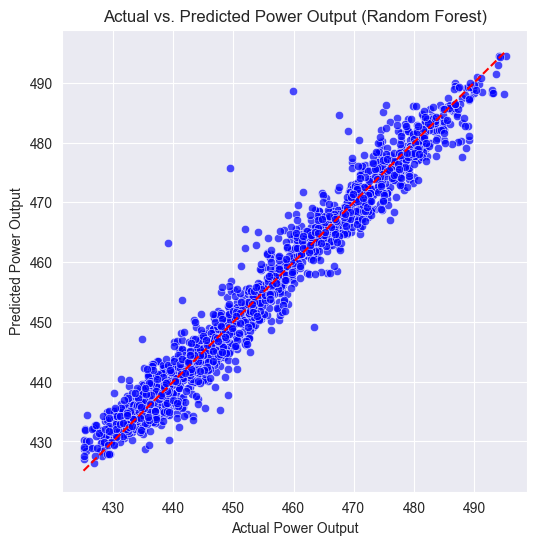

In [19]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # Reference line
plt.xlabel("Actual Power Output")
plt.ylabel("Predicted Power Output")
plt.title("Actual vs. Predicted Power Output (Random Forest)")
plt.show()

17 # Residual Plot

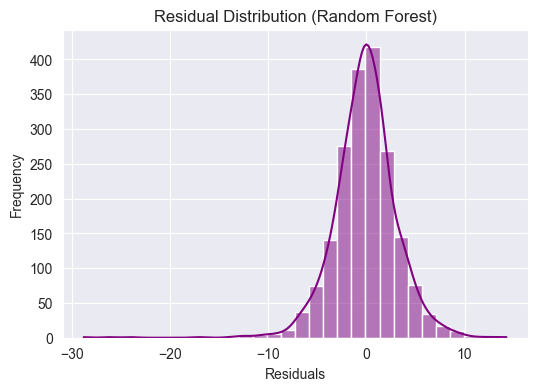

In [20]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Random Forest)")
plt.show()